<a href="https://colab.research.google.com/github/jeewonkimm2/TIL/blob/main/introduction_to_ml_with_python_01_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 25.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=d1747d5381edc5bf87d6ff84d3fa1275692655526403c49bc73e07487596fb7a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


### from preamble import * 오류 해결
https://velog.io/@ssook1222/%EC%98%A4%EB%8A%98%EC%9D%98-%EC%97%90%EB%9F%AC-no-module-named-preamble-Error

In [ ]:
# from preamble import *
%matplotlib inline

ModuleNotFoundError: ignored

In [ ]:
import mglearn

In [ ]:
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


In [ ]:
from scipy import sparse

# diagonal matrix 대각행렬 만들기
eye = np.eye(4)
print("Numpy array:\n",eye)

Numpy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### Sparse Matrix & CSR(Compressed Sparse Row)

**Sparse matrix** : 행렬의 대부분 요소가 0인 행렬

*그와 반대로*

**density 혹은 dense** : 요소가 0이 아닌 행렬

Sparse matrix은 대부분의 요소가 0이기 때문에 효율적인 관리가 필요함

효율적으로 관리하는 방법 중의 하나가 CSR(Compressed Sparse Row) 혹은 COO matrix


참고

https://gaussian37.github.io/math-la-sparse_matrix/

https://bkshin.tistory.com/entry/NLP-7-%ED%9D%AC%EC%86%8C-%ED%96%89%EB%A0%AC-Sparse-Matrix-COO-%ED%98%95%EC%8B%9D-CSR-%ED%98%95%EC%8B%9D

In [ ]:
sparse_matrix = sparse.csr_matrix(eye)
print(sparse_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [ ]:
# coo 행렬 : sparse

data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation : \n", eye_coo)

COO representation : 
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### matplotlib

**%matplotlib inline**란?

주피터 노트북을 실행한 브라우저에서 바로 그림을 볼 수 있게끔 만드는 것.

즉, 브라우저 내부(inline)에 바로 그려지도록 해주는 코드이다.

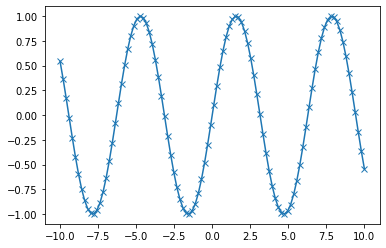

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y,marker='x')

### pandas

In [ ]:
import pandas as pd

data = {'Name':['John','Anna','Peter','Linda'],
       'Location':['New York','Paris','Berlin','London'],
       'Age':[24,13,53,33]}

data_pandas = pd.DataFrame(data)

display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [ ]:
display(data_pandas[data_pandas.Age>30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


## A First Application : Classifying Iris Species

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [ ]:
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])
print(type(iris_dataset['data']))
print(iris_dataset['data'].shape)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'numpy.ndarray'>
(150, 4)


In [ ]:
print(iris_dataset['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print(type(iris_dataset['target']))

<class 'numpy.ndarray'>


In [ ]:
print(iris_dataset['target'].shape)

(150,)


In [ ]:
print(iris_dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


### Look at your data
### 시각화

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ad3f43190>,
      dtype=object)

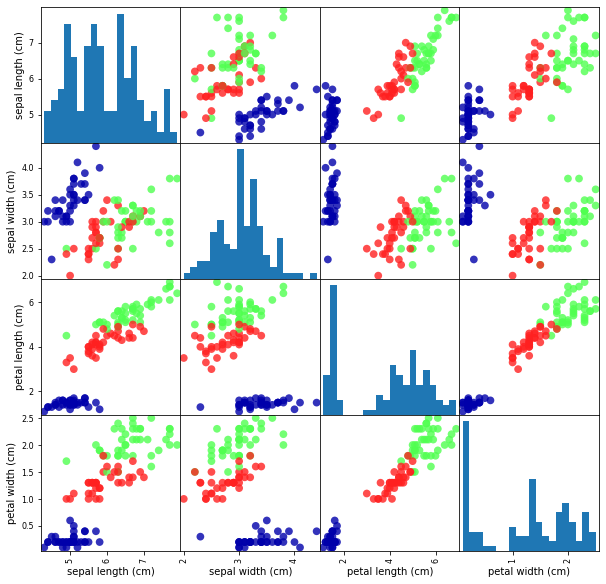

In [ ]:
# scatter_matrix 를 사용한 산점도 행렬 표현

iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize=(10,10),
                          marker = 'o', hist_kwds = {'bins':20}, s=60,
                          alpha = .8, cmap=mglearn.cm3)

### First Model : k-nearest neighbors
### 첫번째 모델 : k-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#### Predictions

In [ ]:
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [ ]:
prediction = knn.predict(X_new)
print("Prediction",prediction)
print("Predicted target name:", iris_dataset['target_names'][prediction])

Prediction [0]
Predicted target name: ['setosa']


### Evaluating the model
### 모델 평가

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [ ]:
print("Test set score {:.2f}".format(np.mean(y_pred == y_test)))

Test set score 0.97


In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


## Summary and Outlook

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
